In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [53]:
img = cv2.imread("img.jpg")

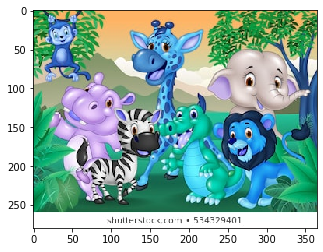

In [54]:
plt.imshow(img);

In [55]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

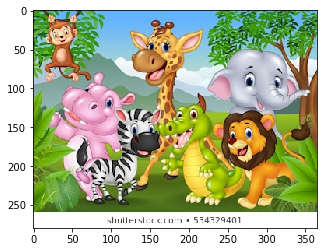

In [56]:
plt.imshow(img);

In [57]:
img.shape

(280, 365, 3)

In [58]:
X = img.reshape((-1, 3))

In [59]:
print(X.shape)

(102200, 3)


In [62]:
km = KMeans(n_clusters=10)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [63]:
centers = km.cluster_centers_
print(centers)

[[130.95404572 160.72466978 143.90635134]
 [131.19329814 174.16778631  28.71457134]
 [ 72.57602644 125.24420088  33.17855486]
 [247.09552729 245.01657776 246.56109971]
 [211.79495936 185.78819753 201.46151219]
 [237.82806505 200.34533163 104.56148365]
 [119.95911713 189.23990469 236.4537246 ]
 [140.84455156  90.36563952  48.26028576]
 [216.21965318 146.5222087   53.49330697]
 [ 57.0468335   46.36278485  28.59751153]]


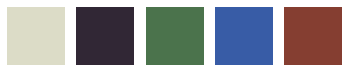

In [27]:
colors = []
for i, color in enumerate(centers):
    plt.subplot(1, 5, i + 1)
    colors.append(color)
    square = np.zeros((100, 100, 3), dtype = 'uint8')
    square[:, :, :] = color
    plt.imshow(square)
    plt.axis('off')
plt.show()

In [40]:
labels = km.labels_

In [41]:
np.unique(km.labels_, return_counts= True)

(array([0, 1, 2, 3, 4], dtype=int32),
 array([ 1074, 52076, 28572, 13489,  5329]))

In [47]:
colors

[array([220.03817505, 220.23091248, 199.2839851 ]),
 array([49.68031339, 39.64300253, 53.27705661]),
 array([ 75.59778804, 115.77778944,  76.82248355]),
 array([ 56.22566536,  92.48320854, 166.89495144]),
 array([133.23681741,  62.57890786,  49.44511165])]

In [48]:
new_img = np.zeros(X.shape)
# print(new_img.shape)

for i in range(X.shape[0]):
    new_img[i] = colors[labels[i]]/255

In [49]:
new_img =  np.reshape(new_img, (img.shape))

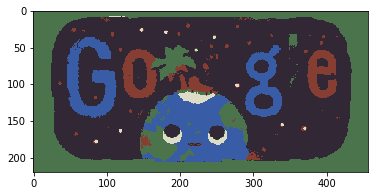

In [51]:
plt.imshow(new_img);